# Session 4 - Time Series Analysis
This workshop covers the fundamentals of time series management with Python. The objective is to provide the student with the fundamental knowledge to process, manage and visualize time series databases in Python. Python codes will be written and executed in Jupyter Notebook. Students will be provided with the databases to run the codes. Session 4 will focus on analyzing time series.

### Session: 1 - July 18
### Time: 4pm- 6pm
### Lecturer: Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

- [1. ACF and PACF](#t1)
    - [1.1. Autocorrelation](#1.1.)
    - [1.2. Partial Autocorrelation](#1.2.)
- [2. Univariate Time Series](#t2)
    - [2.1. White Noise](#2.1.)
    - [2.2. Random Walk](#2.2.)
    - [2.3. Unit Root Test](#2.3.)
    - [2.4. Stationarity](#2.4.)
- [3. AR Models](#t3)
    - [3.1. Autoregressive Process (AR)](#3.1.)
    - [3.2. Estimation of Autoregressive Processes (AR)](#3.2.)
    - [3.3. Forecasting Autoregressive Processes (AR)](#3.3.)
    - [3.4. Estimating the Order of an AR Process: PACF](#3.4.)
    - [3.5. Estimating the Order of an AR Process: Information Criteria](#3.5.)  
- [4. MA Models](#t4)
    - [4.1. Moving Average Processes (MA)](#4.1.)
    - [4.2. Estimation of Moving Average Processes (MA)](#4.2.)
    - [4.3. Forecasting Moving Average Processes (MA)](#4.3.)
    - [4.4. Estimating the Order of an MA Process: PACF](#4.4.)
    - [4.5. Estimating the Order of an AR Process: Information Criteria](#4.5.)
    - [4.6. Equivalence of AR(1) with MA($\infty$)](#4.6.)


In [6]:
# pip install yfinance

In [8]:
import warnings # We import some useful libraries
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy import stats
import yfinance as yf

In [25]:
apple =  yf.download("AAPL", start="2002-01-01", end="2024-06-24")
nvidia = yf.download("NVDA", start="2002-01-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [29]:
apple = apple[["Close"]]
nvidia = nvidia[["Close"]]

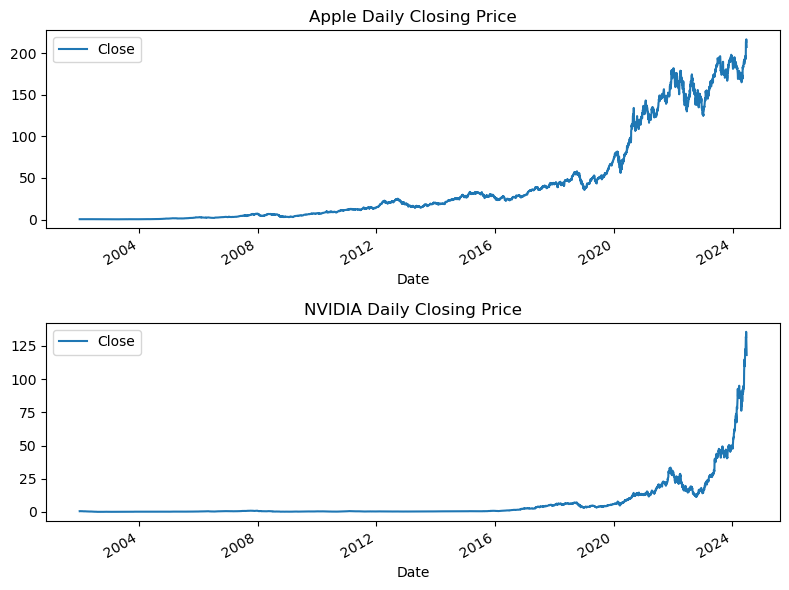

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

apple.plot(y='Close', ax=ax[0])
ax[0].set_title('Apple Daily Closing Price')

nvidia.plot(y='Close', ax=ax[1])
ax[1].set_title('NVIDIA Daily Closing Price')

plt.tight_layout()

plt.show()

#  <a id='t1'> 1. ACF and PACF</a>

##   <a id='1.1.'>1.1. Autocorrelation </a>
Autocorrelation measures the relationship between the values of a time series and their lags, meaning their past values over time. A positive autocorrelation suggests a positive relationship between past and present values, while a negative autocorrelation suggests a negative relationship. This is measured on a scale from -1 to 1.

When a time series has an autoregressive (AR) component, the ACF often takes the form of a slowly decaying "staircase". If the time series lacks an AR component, the ACF decays immediately.

### ```.plot_acf()```
The `plot_acf()` function from the `tsaplots` module to plot the ACF includes confidence intervals in the plot to help identify if autocorrelation values are statistically significant. These confidence intervals are often based on hypothesis tests and help determine if autocorrelation at a specific lag is significant.

In [17]:
from statsmodels.graphics import tsaplots

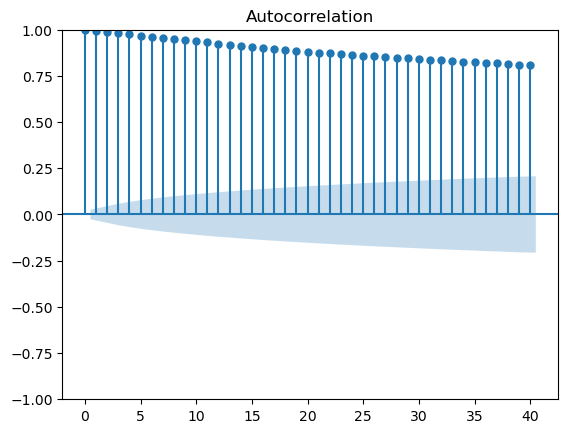

In [39]:
fig = tsaplots.plot_acf(nvidia, lags = 40)

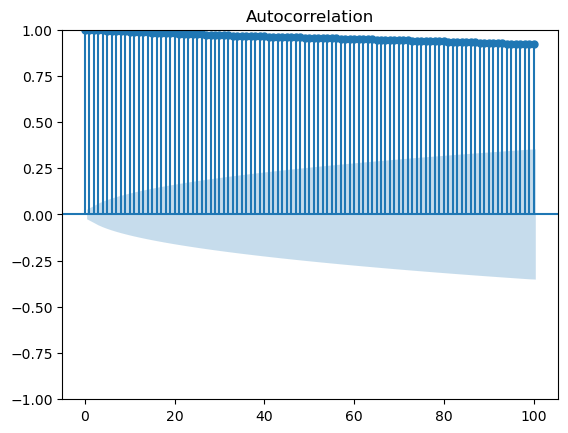

In [40]:
fig = tsaplots.plot_acf(apple, lags = 100)

## <a id='1.2.'>1.2. Partial Autocorrelation </a>

Partial autocorrelation measures the relationship between values of a time series with their lags, accounting for and removing the influence of intermediate lags. This helps identify the direct correlation between values at different time points, without the influence of intervening lags.

When a series has an autoregressive (AR) component, the PACF has a "staircase" shape that abruptly cuts off. This cutoff indicates the number of AR lags to consider when modeling the time series. When the series has a moving average (MA) component, the PACF resembles a "staircase" that decays smoothly.

### ```.plot_pacf()```
The `plot_pacf()` function from `tsaplots`  plots the PACF. This plot includes confidence intervals to help identify whether the partial autocorrelation values are statistically significant or not. 

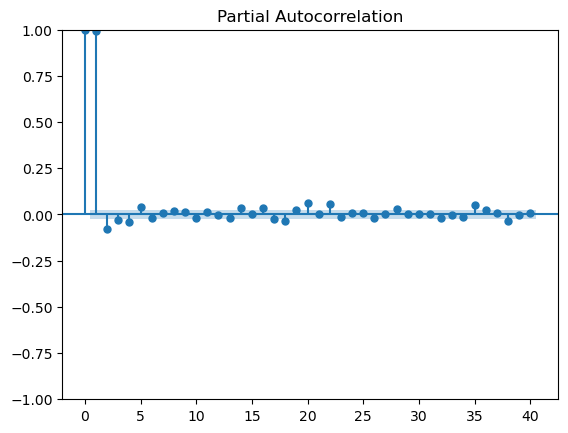

In [41]:
fig = tsaplots.plot_pacf(nvidia, lags = 40)

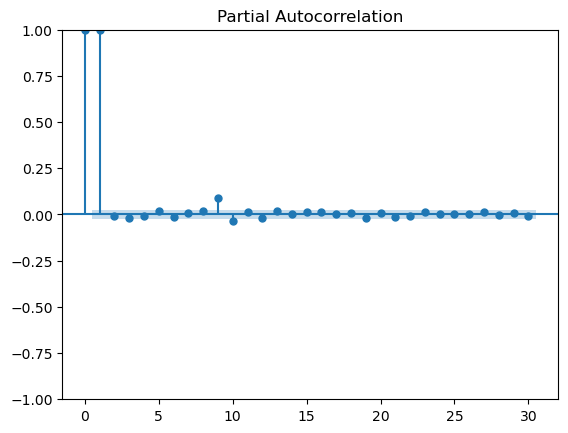

In [42]:
fig = tsaplots.plot_pacf(apple, lags = 30)

### Visualizing an AR process
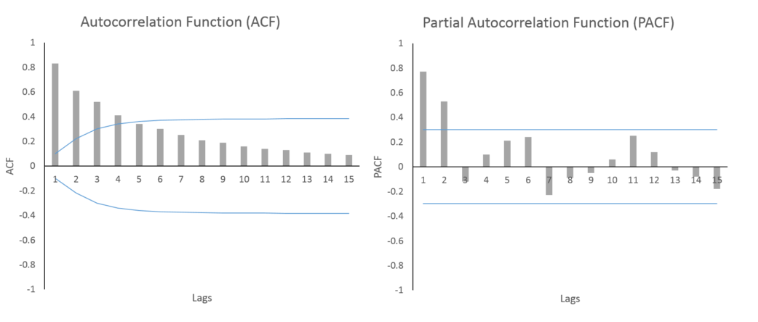

### Visualizing a MA process
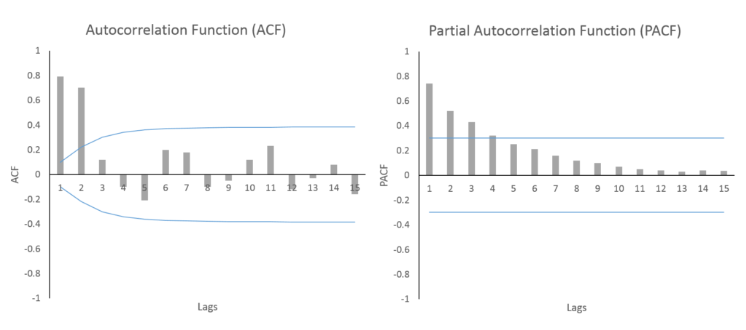

# <a id='t2'> 2. Univariate Time Series </a>

In [52]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.graphics.tsaplots import plot_pacf

  ## <a id='2.1.'>2.1. White Noise </a>
A white noise is a sequence of independently and identically distributed (i.i.d.) values that typically follow a normal (Gaussian) distribution. In time series, white noise is often used to represent unexplained random variability in a dataset, serving as an error term. It is a common component in time series modeling and analysis.

In [45]:
noise = np.random.normal(loc=0, scale=1, size=1000) # Indicamos media 0 y varianza 1

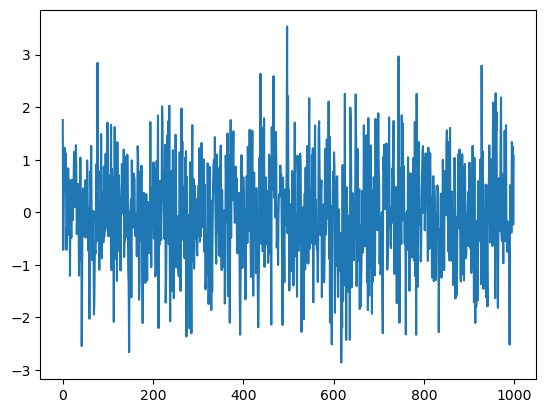

In [46]:
plt.plot(noise)

In [47]:
print('mean: ', np.mean(noise))
print('std: ', np.std(noise))

mean:  -0.029152868220563812
std:  0.9706028267200313


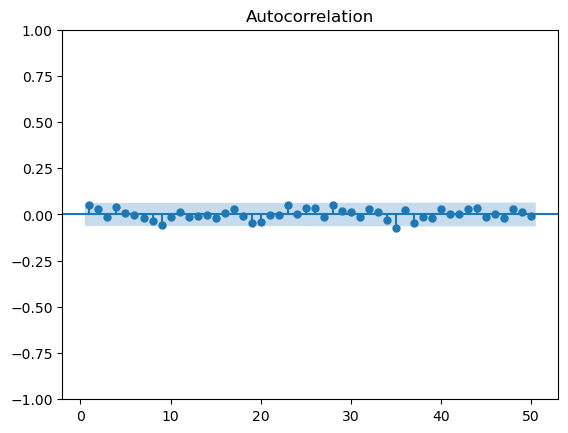

In [48]:
tsaplots.plot_acf(noise, lags = 50, zero=False)
plt.show()

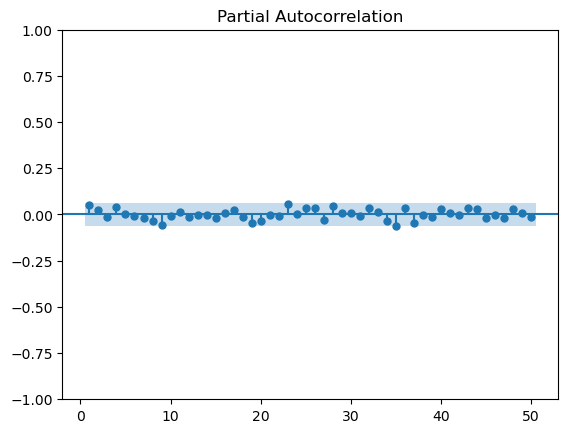

In [49]:
tsaplots.plot_pacf(noise, lags = 50, zero=False)
plt.show()

In [50]:
acf(noise)

array([ 1.        ,  0.05253624,  0.02840388, -0.01264355,  0.04103061,
        0.00779078, -0.00384507, -0.01786649, -0.03669752, -0.05910419,
       -0.01364785,  0.0111436 , -0.01324436, -0.00558285, -0.00475599,
       -0.01731699,  0.00985345,  0.02972609, -0.00582677, -0.04605927,
       -0.04091828, -0.00194614, -0.00497351,  0.05010281,  0.00442219,
        0.03575138,  0.03448863, -0.01156323,  0.05076708,  0.01721573,
        0.01378574])

In [51]:
pacf(noise)

array([ 1.00000000e+00,  5.25888335e-02,  2.57664801e-02, -1.55480733e-02,
        4.20661701e-02,  4.31413170e-03, -7.00967211e-03, -1.65760575e-02,
       -3.66410476e-02, -5.59855612e-02, -6.19316737e-03,  1.58182400e-02,
       -1.28935403e-02, -1.56106091e-04, -2.32969266e-03, -2.04022261e-02,
        9.80779706e-03,  2.66816377e-02, -1.34141794e-02, -4.67295753e-02,
       -3.62490779e-02, -2.81385027e-04, -5.53362028e-03,  5.49077690e-02,
        2.97241637e-03,  3.63391479e-02,  3.59274371e-02, -2.75826588e-02,
        4.41300316e-02,  8.03712789e-03,  7.38833756e-03])

  ## <a id='2.2.'>2.2. Random Walk </a>
  $$y_t = y_{t-1} + \epsilon_t$$
  
$$\epsilon_t \sim N(0, \sigma^2)$$

In econometrics, the term "Random Walk" refers to a statistical model that describes a time series where each observation is equal to the previous observation plus a random error term, akin to white noise. This model excludes other explanatory or deterministic variables that could account for changes in the time series, attributing any changes solely to randomness.

Its main characteristics are:
1. No deterministic trend: It does not include deterministic variables (such as linear trends or seasonal components) that explain changes in the time series. Any change in the series is attributed to the random error term.

2. Independence: Each change in the series is independent of previous changes. There is no autocorrelation in the errors.

3. Non-stationary: It is a non-stationary process, meaning that the mean and variance of the series change over time. This distinguishes it from stationary processes where the mean and variance are constant.

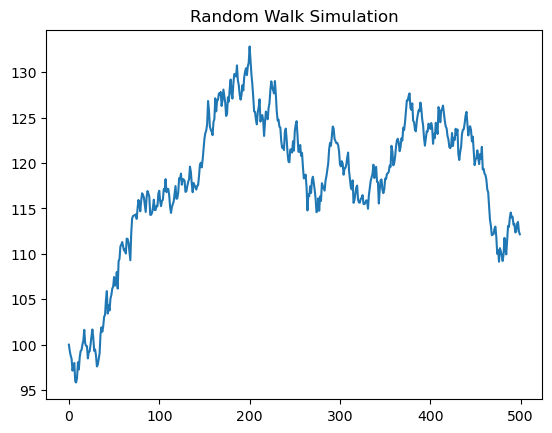

In [54]:
# Generate a Random Walk to model stock prices

# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set the first element to 0
steps[0] = 0

# Simulate stock prices, P, starting with an initial price of 100 (drift model with drift = 100)
P = 100 + np.cumsum(steps)

# Plot the simulation of stock prices
plt.plot(P)
plt.title("Random Walk Simulation")
plt.show()

Each time we run the code, a different random walk will be simulated.

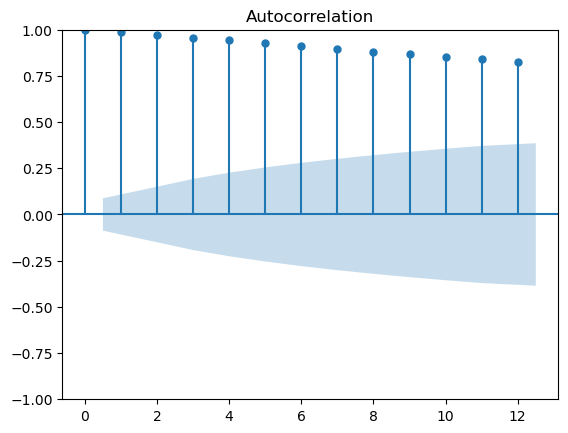

In [55]:
tsaplots.plot_acf(P, lags = 12)
plt.show()

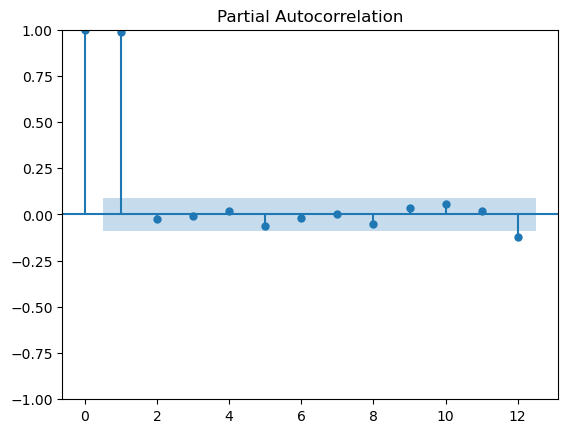

In [56]:
tsaplots.plot_pacf(P, lags = 12)
plt.show()

  ## <a id='2.3.'>2.3. Unit Root Test </a>

A unit root test evaluates whether a time series exhibits a long-term trend or is stationary around a constant mean. If evidence of a unit root is found, differencing techniques can be applied to remove the trend and make the data stationary.

- The RU tests are based on series without trend (\(\hat{u}_t\)) obtained using some detrending method.
- Null Hypothesis:

 
  \begin{aligned}
  H_0 &: \phi = 1 \quad (\text{unit root exists}) \\
  H_1 &: \phi < 1 
  \end{aligned}


  Note: The test is one-tailed.

- The RU tests consider the OLS estimator of ($\phi$) in:


  $$ u_t = \phi u_{t-1} + v_t $$ 
  $$ v_t \sim \text{iid}(0, \sigma^2) $$


  obtained through a regression of \(\hat{u}_t\) on \(\hat{u}_{t-1}\):


  $$\hat{\phi} = \frac{\sum_{t=2}^T \hat{u}_t \hat{u}_{t-1}}{\sum_{t=2}^T \hat{u}_{t-1}^2}$$


We will learn how to perform the augmented Dickey-Fuller test. However, to do this, we will use the following specification based on the model in (3):

$$ u_t = \phi u_{t-1} + v_t, \quad v_t \sim \text{iid}(0, \sigma^2) $$

Rearranging (3) by subtracting $u_{t-1}$ from both sides, we get:

  $$ \Delta u_t = (\phi - 1)u_{t-1} + v_t $$

 where 

  $$ \alpha = \phi - 1 $$
and 

  $$ v_t \sim \text{iid}(0, \sigma^2) $$

The RU test 

  $$ \phi = 1 $$

  is now the RU test 

  $$ \alpha = 0 $$

  so that $H_0$ in terms of $\alpha$ is:
  
  $$H_0: \alpha = 0,  y_t \sim I(1)$$

 $$H_1: \alpha < 0, y_t \sim I(0)$$

For our stock price model
- Regression test for random walk

  $P_t - P_{t-1} = \alpha + \beta P_{t-1} + \epsilon_t$

- Test:

  $H_0: \beta = 0$ (random walk)

  $H_1: \beta < 0$ (not random walk)


### ```adfuller()```

In [57]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(P)
print(results)

(-2.285354483396029, 0.17673495621225987, 0, 499, {'1%': -3.4435228622952065, '5%': -2.867349510566146, '10%': -2.569864247011056}, 1358.6184818295178)


In [62]:
print(' H0: Unit root', '\n', 'H1: No unit root')
print('The t-statistic of the test in P is: ' + str(results[0]) + ' and a critical value of ' + str(results[4]['10%']))
print('The p-value of the test in P is: ' + str(results[1]))
print('Since the calculated t-statistic does not exceed the critical value at 10% in absolute terms, we do not reject H0. There is a unit root')
print('Since the p-value is not close to zero, we do not reject H0. There is a unit root')

 H0: Unit root 
 H1: No unit root
The t-statistic of the test in P is: -2.285354483396029 and a critical value of -2.569864247011056
The p-value of the test in P is: 0.17673495621225987
Since the calculated t-statistic does not exceed the critical value at 10% in absolute terms, we do not reject H0. There is a unit root
Since the p-value is not close to zero, we do not reject H0. There is a unit root


  ## <a id='2.4.'>2.4. Stationarity </a>

In [1]:
amazon = yf.download("AMZN", start="2002-01-01", end="2022-12-31")

NameError: name 'yf' is not defined

In [64]:
amazon.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5.287000e+03
mean,37.425930,37.860883,36.943025,37.408017,37.408017,1.198941e+08
std,50.654984,51.247480,49.986565,50.610180,50.610180,9.560508e+07
min,0.480000,0.492500,0.451500,0.456500,0.456500,1.762600e+07
25%,2.580750,2.636250,2.533500,2.579500,2.579500,6.603800e+07
50%,11.329500,11.534000,11.230000,11.367500,11.367500,9.869000e+07
75%,50.298750,50.501251,49.880501,50.148500,50.148500,1.443110e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


In [ ]:
plt.plot(amazon['Adj Close']) # Serie en niveles

In [ ]:
plt.plot(np.log(amazon['Adj Close'])) # Serie en logatirmos

In [ ]:
plt.plot(np.log(amazon['Adj Close'].diff())) # Serie en diferencias

### ```In levels```

In [66]:
results_1 = adfuller(amazon['Close'])
print(results_1)

(-0.8088222707271139, 0.8165168461018469, 33, 5253, {'1%': -3.4315954784667735, '5%': -2.8620903726378546, '10%': -2.567062963019618}, 18038.15368612288)


In [67]:
print(' H0: Unit root', '\n', 'H1: No unit root')
print('The t-statistic of the test in Amazon is: ' + str(results_1[0]) + ' and a critical value of ' + str(results_1[4]['5%']))
print('The p-value of the test in Amazon is: ' + str(results_1[1]))
print('Since the calculated t-statistic does not exceed the critical value at 5% in absolute terms, we do not reject H0. There is a unit root')
print('Since the p-value is not close to zero, we do not reject H0. There is a unit root')

 H0: Unit root 
 H1: No unit root
The t-statistic of the test in Amazon is: -0.8088222707271139 and a critical value of -2.8620903726378546
The p-value of the test in Amazon is: 0.8165168461018469
Since the calculated t-statistic does not exceed the critical value at 5% in absolute terms, we do not reject H0. There is a unit root
Since the p-value is not close to zero, we do not reject H0. There is a unit root


### ```In logs```

In [69]:
results_2 = adfuller(np.log(amazon['Adj Close']))
print(results_2)

(-1.446689478358713, 0.5596994187128427, 2, 5284, {'1%': -3.431588167979747, '5%': -2.862087142831372, '10%': -2.567061243679948}, -23694.636238285173)


In [70]:
print(' H0: Unit root', '\n', 'H1: No unit root')
print('The t-statistic of the test in Amazon is: ' + str(results_2[0]) + ' and a critical value of ' + str(results_2[4]['5%']))
print('The p-value of the test in Amazon is: ' + str(results_2[1]))
print('Since the calculated t-statistic does not exceed the critical value at 5% in absolute terms, we do not reject H0. There is a unit root')
print('Since the p-value is not close to zero, we do not reject H0. There is a unit root')

 H0: Unit root 
 H1: No unit root
The t-statistic of the test in Amazon is: -1.446689478358713 and a critical value of -2.862087142831372
The p-value of the test in Amazon is: 0.5596994187128427
Since the calculated t-statistic does not exceed the critical value at 5% in absolute terms, we do not reject H0. There is a unit root
Since the p-value is not close to zero, we do not reject H0. There is a unit root


### ```In diffs```

In [74]:
results_3 = adfuller(amazon['Close'].diff().fillna(0))
print(results_3)

(-12.825036235512849, 6.039148729181019e-24, 33, 5253, {'1%': -3.4315954784667735, '5%': -2.8620903726378546, '10%': -2.567062963019618}, 18028.91970902489)


In [76]:
print(' H0: Unit root', '\n', 'H1: No unit root')
print('The t-statistic of the test in Amazon is: ' + str(results_3[0]) + ' and a critical value of ' + str(results_3[4]['5%']))
print('The p-value of the test in Amazon is: ' + str(results_3[1]))
print('Since the calculated t-statistic exceeds the critical value at 5% in absolute terms, we reject H0. No unit root')
print('Since the p-value < 0.05, we reject H0. No unit root')

 H0: Unit root 
 H1: No unit root
The t-statistic of the test in Amazon is: -12.825036235512849 and a critical value of -2.8620903726378546
The p-value of the test in Amazon is: 6.039148729181019e-24
Since the calculated t-statistic exceeds the critical value at 5% in absolute terms, we reject H0. No unit root
Since the p-value < 0.05, we reject H0. No unit root


We observe that both the series in levels and in logarithms exhibit a unit root. However, the differenced series is no longer stationary. Therefore, if we want to transform a non-stationary series into a stationary one, simply taking the logarithm of the series is not sufficient; we must differentiate it.

# <a id='t3'> 3. AR Models </a>

## <a id='3.1.'>3.1. Autoregressive Process (AR) </a>
In an AR model, it is assumed that the current value of a time series depends linearly on its past values and a stochastic error term.

Key characteristics include:
1. **Temporal Dependence**: In an AR(p) model, where "p" is the order of the model, the current value of the time series depends on its "p" previous values, weighted by autoregressive coefficients. This implies that AR models capture the short-term memory of the series.
2. **Autoregressive Coefficients** ($\phi_1$, ... , $\phi_p$): These are parameters indicating the influence of past values on the current value. Their values range from $-1 < \phi < 1$, but they do not exactly reach one, as that would result in a random walk (a non-stationary process). The coefficients must be estimated from the data.
3. **Model Order**: This is usually chosen graphically through visual analysis of the ACF and PACF plots, or using information criteria.

Given
  $$y_t = \phi y_{t-1} + \epsilon_t$$
  
$$\epsilon_t \sim N(0, \sigma^2)$$
Depending on the value of $\phi$.

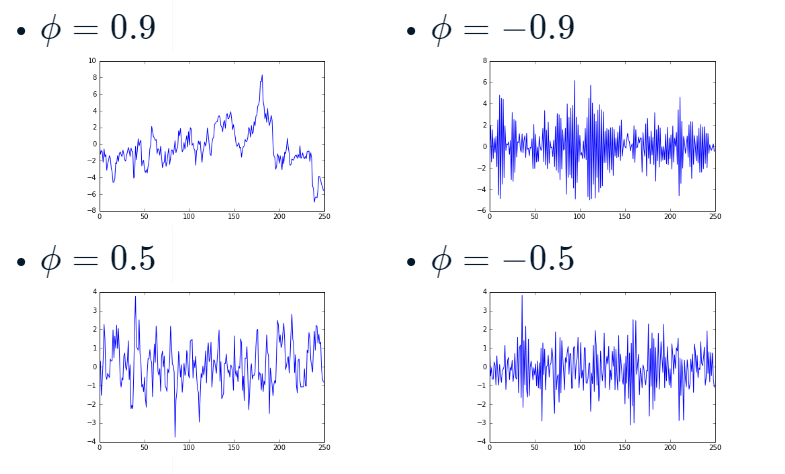

The closer $\phi$ is to 1, the more the process looks like a random walk, the closer it is to 0, the more it looks like white noise.

Their respective ACFs would be

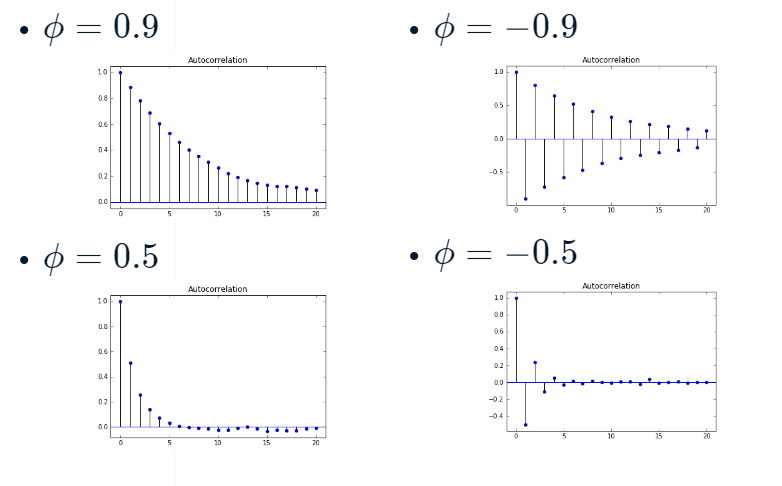

where ARs with negative $\phi$ show a positive autocorrelation, followed by a negative autocorrelation, and constantly interspersing 

Likewise, the $AR(p)$ models of higher order $p$ would be represented by

- **AR(1)**
  
  $$
  Y_t = \mu + \phi_1 Y_{t-1} + \epsilon_t
  $$

- **AR(2)**
  
  $$
  Y_t = \mu + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t
  $$

- **AR(3)**
  
  $$
  Y_t = \mu + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} + \epsilon_t
  $$


and in general, an $AR(p)$

$$Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p} + \epsilon_t$$

$$\epsilon_t \sim iid \, (0, \sigma^2)$$


### Simulating an AR Model
We will simulate and plot some AR(1) time series, each with a different parameter, using the `arima_process` module from `statsmodels`. We import `ArmaProcess` and add two arrays to it, one with the AR component and the other with the MA component, which for now we leave as 1 and will be discussed in detail in section 5.

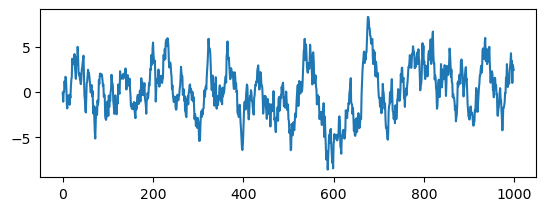

In [77]:
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

In [ ]:
# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, +0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

In [ ]:
# Plot 3: AR parameter = +0.3
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)

In [ ]:
# Plot 4: AR parameter = -0.3
ar4 = np.array([1, 0.3])
ma4 = np.array([1])
AR_object4 = ArmaProcess(ar4, ma4)
simulated_data_4 = AR_object4.generate_sample(nsample=1000)
plt.plot(simulated_data_4)

### Comparar el ACF de los procesos AR

In [ ]:
# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

# Plot 4: AR parameter = -0.3
plot_acf(simulated_data_4, alpha=1, lags=20)
plt.show()

## <a id='3.2.'>3.2. Estimation of Autoregressive Processes (AR) </a>

To estimate parameters from data we will use:

```python
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(data, order=(1,0,0))
result = mod.fit()
```
- Remember that an ARMA(p,q) its equivalent to and ARIMA(p,d,q), where d = 0
- Since `ARMA()` has been deprecated, we will be using `ARIMA()`

In [ ]:
# First, we convert the arrays of the simulated variables into dataframes.
simulated_data_1 = pd.DataFrame(simulated_data_1)
simulated_data_1.columns = ['Data']

simulated_data_2 = pd.DataFrame(simulated_data_2)
simulated_data_2.columns = ['Data']

simulated_data_3 = pd.DataFrame(simulated_data_3)
simulated_data_3.columns = ['Data']

simulated_data_4 = pd.DataFrame(simulated_data_4)
simulated_data_4.columns = ['Data']

In [ ]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA # It has been deprecated

# Fit an AR(1) model to the simulated_data_1
model = ARIMA(simulated_data_1, order=(1, 0, 0))
results = model.fit()

# Print the results of the fit
print(results.summary())

# Print the estimation of phi
print(f"When the true value of phi is 0.9, the estimate of phi is: {results.params[1]:.2f}")


In [ ]:
# Fit an AR(1) model to the simulated_data_2
model = ARIMA(simulated_data_2, order=(1, 0, 0))
results = model.fit()

# Print the results of the fit
print(results.summary())

# Print the estimation of phi
print(f"When the true value of phi is -0.9, the estimate of phi is: {results.params[1]:.2f}")

In [ ]:
# Fit an AR(1) model to the simulated data
mod = ARIMA(simulated_data_3, order=(1, 0, 0))
res = mod.fit()

# Print summary information about the fit
print(res.summary())

# Print the estimate for phi
print(f"When the true value of phi is 0.3, the estimate of phi is: {res.params[1]:.2f}")

In [ ]:
# Fit an AR(1) model to the simulated data
mod = ARIMA(simulated_data_4, order=(1, 0, 0))
res = mod.fit()

# Print summary information about the fit
print(res.summary())

# Print the estimate for phi
print("When the true value of phi is -0.3, the estimate of phi is: ", res.params[1])


## <a id='3.3.'>3.3. Forecasting Autoregressive Processes (AR) </a>
In addition to estimating the parameters of a model, as we did in the previous exercise, you can also make forecasts, both in-sample and out-of-sample, using statistical models. In-sample forecasting involves predicting the next data point using the data up to that point, while out-of-sample forecasting involves predicting any number of data points in the future. You can plot the forecasted data using the `plot_predict()` function. You need to specify the start point of the prediction and the end point, which can be any number of data points beyond the end of the dataset.

In [ ]:
# Importamos ARIMA plot_predict de statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast para el modelo AR(1)
model = ARIMA(simulated_data_1, order=(1,0,0))
results = model.fit()

# Gráfica de la data y el forecast fuera de la muestra
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(results, start=999, end=1010, ax=ax)
plt.show()

In [ ]:
# Importamos ARIMA plot_predict de statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast para el modelo AR(1)
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Gráfica de la data y el forecast dentro de la muestra
fig, ax = plt.subplots()
simulated_data_1.loc[800:].plot(ax=ax)
plot_predict(res, start=950, end=1000, ax=ax)
plt.show()

In [ ]:
# Forecast para el modelo AR(1)
mod = ARIMA(simulated_data_2, order=(1,0,0))
res = mod.fit()

# Gráfica de la data y el forecast
fig, ax = plt.subplots()
simulated_data_2.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

In [ ]:
# Forecast para el modelo AR(1)
mod = ARIMA(simulated_data_4, order=(1,0,0))
res = mod.fit()

# Gráfica de la data y el forecast
fig, ax = plt.subplots()
simulated_data_4.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

## <a id='3.4.'>3.4. Estimating the Order of an AR Process: PACF </a>
A tool to determine the order of an autoregressive (AR) model is to analyze the Partial Autocorrelation Function (PACF). In this exercise, two simulated time series will be generated: one with an AR(1) process and another with an AR(2) process. The sample PACF will be calculated for each of them. You should observe that in the case of an AR(1) model, the PACF should show a significant value at lag 1 and approximately zero values for subsequent lags. In the case of an AR(2) model, the sample PACF should reveal significant values at lags 1 and 2, followed by near-zero values for subsequent lags.

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulamos un AR(1) con phi=+0.6
ar = np.array([1, -0.6])
ma = np.array([1])
Ar_object = ArmaProcess(ar, ma)
simulated_data_1 = Ar_object.generate_sample(nsample = 5000)

# Graficamos el PACF para el AR(1)
plot_pacf(simulated_data_1, lags = 20, alpha = 0.05)
plt.show()

In [ ]:
# Simulamos un AR(2) para phi1=+0.6, phi2=+0.3
ar = np.array([1, -0.6, -0.3])
ma = np.array([1])
Ar_object = ArmaProcess(ar, ma)
simulated_data_2 = Ar_object.generate_sample(nsample = 5000)

# Graficamos el PACF para AR(2)
plot_pacf(simulated_data_2, lags = 20)
plt.show()

In [ ]:
# Simulamos un AR(3) para phi1=+0.4, phi2=+0.3, phi3=+0.1
ar = np.array([1, -0.4, -0.3, -0.1])
ma = np.array([1])
Ar_object = ArmaProcess(ar, ma)
simulated_data_3 = Ar_object.generate_sample(nsample = 5000)

# Graficamos el PACF para AR(3)
plot_pacf(simulated_data_3, lags = 20, zero=False)
plt.show()

## <a id='3.5.'>3.5. Estimating the Order of an AR Process: Information Criteria </a>
Another tool for identifying the order of a model is to observe the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures calculate the goodness of fit with the estimated parameters but apply a penalty function to the number of parameters in the model.

- The Akaike Information Criterion (AIC):

  $$ \text{AIC}(p, q) = \ln(\hat{\sigma}^2) + \frac{2(p + q)}{T} $$

- The Bayesian Information Criterion (BIC):

  $$ \text{BIC}(p, q) = \ln(\hat{\sigma}^2) + \frac{\ln(T)(p + q)}{T} $$

  where $\hat{\sigma}^2$ is the estimator of $\sigma^2$.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

BIC = np.zeros(7)
AIC = np.zeros(7)
HQIC = np.zeros(7)

# Fiteamos los data para un AR(p) para p = 0,...,6 , y lo guardamos en el BIC, AIC y HQIC
for p in range(7):
    mod = ARIMA(simulated_data_2, order = (p, 0, 0)) # Usamos el AR(3)
    results = mod.fit()
    # Save BIC for AR(p)    
    BIC[p] = results.bic
    AIC[p] = results.aic
    HQIC[p] = results.hqic


In [ ]:
# Graficamos el criterio de información BIC
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Bayesian Information Criteria')
plt.show()

In [ ]:
plt.plot(range(1,7), AIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Akaike Information Criteria')
plt.show()

In [ ]:
plt.plot(range(1,7), HQIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Hanan-Quinn Information Criteria')
plt.show()

In [ ]:
# Graficamos los 3 criterios de información
plt.subplot(3,1,1)
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Bayesian Information Criteria')
plt.show()

plt.subplot(3,1,2)
plt.plot(range(1,7), AIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Akaike Information Criteria')
plt.show()

plt.subplot(3,1,3)
plt.plot(range(1,7), HQIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Hanan-Quinn Information Criteria')
plt.show()

# <a id='t4'> 4. MA Models </a>

## <a id='4.1.'>4.1. Moving Average Processes (MA) </a>
A moving average series refers to one in which each value in the time series is the result of a linear combination of previous error values. In other words, the current value of the series is calculated as a weighted sum of previous prediction errors.

Sea un MA(1):
$$
Y_t = \mu + \epsilon_t + \theta \epsilon_{t-1}
$$

$$
\epsilon_t \sim iid \, (0, \sigma^2)
$$

- Negative $( \theta )$: One-Period Mean Reversion
- Positive $( \theta )$: One-Period Momentum
- Note: One-period autocorrelation is $( \theta / (1 + \theta^2))$, not $( \theta )$

Podemos comparar las ACFs para distintos valores de $\theta$
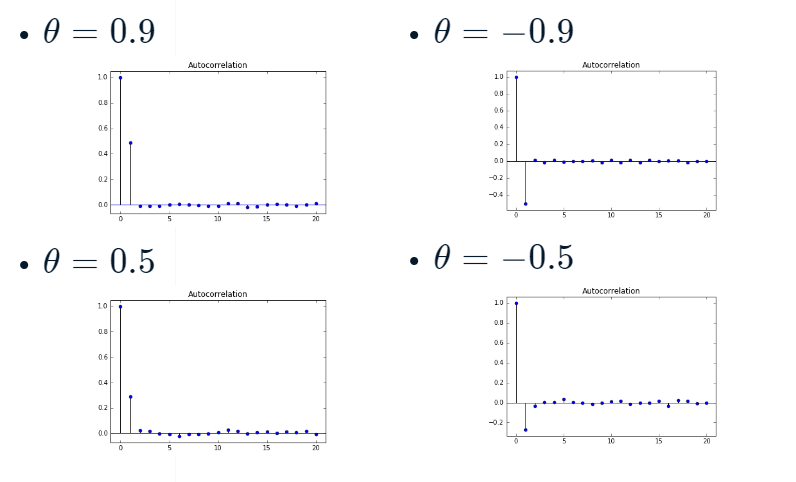

Likewise, higher order \( MA(q) \) models would be represented as:

- **MA(1)**
  
  $$
  Y_t = \mu + \epsilon_t - \theta_1 \epsilon_{t-1}
  $$

- **MA(2)**
  
  $$
  Y_t = \mu + \epsilon_t - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2}
  $$

- **MA(3)**
  
  $$
  Y_t = \mu + \epsilon_t - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3}
  $$

And in general:

$$
Y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
$$

$$
\epsilon_t \sim iid \, (0, \sigma^2)
$$


### Simulation of MA(1) time series
We will simulate and plot some MA(1) time series, each with a different parameter, using the arima_process module of statsmodels. We import ArmaProcess and add two arrays, one with the AR component and one with the MA component.

In [ ]:
# Plot 1: MA parameter = -0.9
plt.subplot(3, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
Arma_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = Arma_object1.generate_sample(nsample = 1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(3, 1 , 2)
ar2 = np.array([1])
ma2 = np.array([1, +0.9])
Arma_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = Arma_object2.generate_sample(nsample = 1000)
plt.plot(simulated_data_2)


# Plot 2: MA parameter = +0.5
plt.subplot(3, 1 , 3)
ar3 = np.array([1])
ma3 = np.array([1, +0.5])
Arma_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = Arma_object3.generate_sample(nsample = 1000)
plt.plot(simulated_data_3)

### Compare the PACF of AR processes

In [3]:
# Plot 1: MA parameter = -0.9
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Plot 2: MA parameter = 0.9
plot_pacf(simulated_data_2, lags = 20)
plt.show()

NameError: name 'plot_pacf' is not defined

## <a id='4.2.'>4.2. Estimation of Moving Average Processes (MA) </a>

In [ ]:
# Importar el módulo ARIMA de statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Ajustar un modelo MA(1) a los primeros datos simulados
mod = ARIMA(simulated_data_1, order = (0, 0, 1))
res = mod.fit()

# Imprimir información resumida sobre el ajuste
print(res.summary())

# Imprimir la estimación de la constante y de theta
print("Cuando theta verdadero=-0.9, la estimación de theta es:")
print(res.params[1])

In [ ]:
# Ajustar un modelo MA(1) a los primeros datos simulados
mod = ARIMA(simulated_data_2, order = (0, 0, 1))
res = mod.fit()

# Imprimir información resumida sobre el ajuste
print(res.summary())

# Imprimir la estimación de la constante y de theta
print("Cuando theta verdadero=0.9, la estimación de theta es:")
print(res.params[1])

In [ ]:
# Ajustar un modelo MA(1) a los primeros datos simulados
mod = ARIMA(simulated_data_3, order = (0, 0, 1))
res = mod.fit()

# Imprimir información resumida sobre el ajuste
print(res.summary())

# Imprimir la estimación de la constante y de theta
print("Cuando theta verdadero=0.5, la estimación de theta es:")
print(res.params[1])

## <a id='4.3.'>4.3. Forecasting Moving Average Processes (MA) </a>
As we did with AR models, you can use MA models to predict in-sample and out-of-sample data using the plot_predict() function in statsmodels.

In [ ]:
# Primero transformamos a dataframes los arrays de las variables simuladas
simulated_data_1 = pd.DataFrame(simulated_data_1)
simulated_data_1.columns = ['Data']

simulated_data_2 = pd.DataFrame(simulated_data_2)
simulated_data_2.columns = ['Data']

simulated_data_3 = pd.DataFrame(simulated_data_3)
simulated_data_3.columns = ['Data']

In [ ]:
# Forecast del modelo MA(1)
mod = ARIMA(simulated_data_1, order = (0, 0, 1))
res = mod.fit()

# Graficamos la data y el forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start = 999 , end = 1010 , ax=ax)
plt.show()

In [ ]:
# Forecast del modelo MA(1)
mod = ARIMA(simulated_data_2, order = (0, 0, 1))
res = mod.fit()

# Graficamos la data y el forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start = 999 , end = 1010 , ax=ax)
plt.show()

In [ ]:
# Forecast del modelo MA(1)
mod = ARIMA(simulated_data_3, order = (0, 0, 1))
res = mod.fit()

# Graficamos la data y el forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start = 999 , end = 1010 , ax=ax)
plt.show()

 ## <a id='4.4.'>4.4. Estimating the Order of an MA Process: PACF </a>

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Simulamos un MA(1) con theta=+0.6
ar = np.array([1])
ma = np.array([1, +0.6])
Ar_object = ArmaProcess(ar, ma)
simulated_data_1 = Ar_object.generate_sample(nsample = 5000)

# Graficamos el PACF para el AR(1)
plot_acf(simulated_data_1, lags = 20, alpha = 0.05)
plt.show()

In [ ]:
# Simulamos un MA(2) con theta=+0.6, theta=+0.4
ar = np.array([1])
ma = np.array([1, +0.6, +0.4])
Ar_object = ArmaProcess(ar, ma)
simulated_data_2 = Ar_object.generate_sample(nsample = 5000)

# Graficamos el PACF para el AR(1)
plot_acf(simulated_data_2, lags = 20, alpha = 0.05)
plt.show()

In [ ]:
# Simulamos un MA(3) con theta=+0.6, theta=+0.4, theta=-0.2
ar = np.array([1])
ma = np.array([1, +0.6, +0.4, -0.2])
Ar_object = ArmaProcess(ar, ma)
simulated_data_3 = Ar_object.generate_sample(nsample = 5000)

# Graficamos el PACF para el AR(1)
plot_acf(simulated_data_3, lags = 20, alpha = 0.05)
plt.show()

## <a id='4.5.'>4.5. Estimating the Order of an AR Process: Information Criteria </a>

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

BIC = np.zeros(7)
AIC = np.zeros(7)
HQIC = np.zeros(7)

# We fit an AR(p) for p = 0,...,6 , and save its BIC, AIC y HQIC
for q in range(7):
    mod = ARIMA(simulated_data_3, order = (0, 0, q)) # Our theorical modal is an AR(3)
    res = mod.fit()
    # We save the IC for the MA(q)
    BIC[q] = res.bic
    AIC[q] = res.aic
    HQIC[q] = res.hqic

In [ ]:
# Graficamos el criterio de información BIC
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Bayesian Information Criteria')
plt.show()

In [ ]:
# Graficamos los 3 criterios de información
plt.subplot(3,1,1)
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Bayesian Information Criteria')
plt.show()

plt.subplot(3,1,2)
plt.plot(range(1,7), AIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Akaike Information Criteria')
plt.show()

plt.subplot(3,1,3)
plt.plot(range(1,7), HQIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Hanan-Quinn Information Criteria')
plt.show()

## <a id='4.6.'>4.6. Equivalence of AR(1) with MA($\infty$) </a>

In [ ]:
# Importar los módulos para simular datos y graficar la ACF (Función de Autocorrelación)
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Construir una lista de parámetros MA 
ma = [.8**i for i in range(30)]

# Simular el modelo MA(30)
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Graficar la ACF 
plot_acf(simulated_data, lags=30)
plt.show()


In [ ]:
# Simular el modelo AR(1) con phi=+0.8
ma = np.array([1])
ar = np.array([1, -0.8])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Graficar la ACF 
plot_acf(simulated_data, lags=30)
plt.show()